# Lab 6 (27-02-2024)

This lab experiments help you master how to do Naive Bayes Classifier. We will be using Heart disease dataset. 

In [1]:
Registration_Number = "22011103010"
Name = "Deepthi"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Deepthi and my roll no : 22011103010
Computer IP Address is: 10.18.13.215


Read through [Naive Bayes Classifier](https://www.geeksforgeeks.org/naive-bayes-classifiers/)

Following experiments are expected
1. Perform monomial naive bayes classifier
    - Plot a graph for accuracy vs %test_data
    - Plot a graph for accuracy vs each feature for 80% test-train split
2. Perform Naive bayes classifier using Gaussian
    - Plot a graph for accuracy with addition of different features

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Split data into features (X) and target variable (y)
X = df.drop('serum_cholestoral', axis=1)
y = df['serum_cholestoral']

# Experiment 1: Perform Monomial Naive Bayes classifier
test_sizes = np.linspace(0.1, 0.9, 9)
accuracies_test_size = []
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = MultinomialNB()  # Using Multinomial Naive Bayes for Monomial
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracies_test_size.append(accuracy)


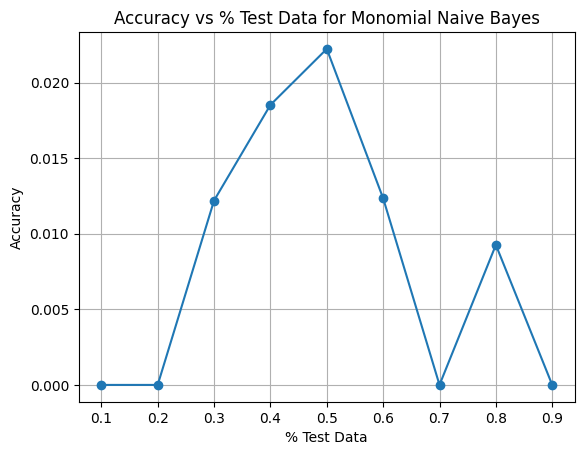

In [3]:
plt.figure()
plt.plot(test_sizes, accuracies_test_size, marker='o')
plt.xlabel('% Test Data')
plt.ylabel('Accuracy')
plt.title('Accuracy vs % Test Data for Monomial Naive Bayes')
plt.grid(True)
plt.show()

In [4]:
num_features = X.shape[1]
accuracies_features = []
for i in range(num_features):
    X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :i+1], y, test_size=0.2, random_state=42)
    model = GaussianNB()
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracies_features.append(accuracy)

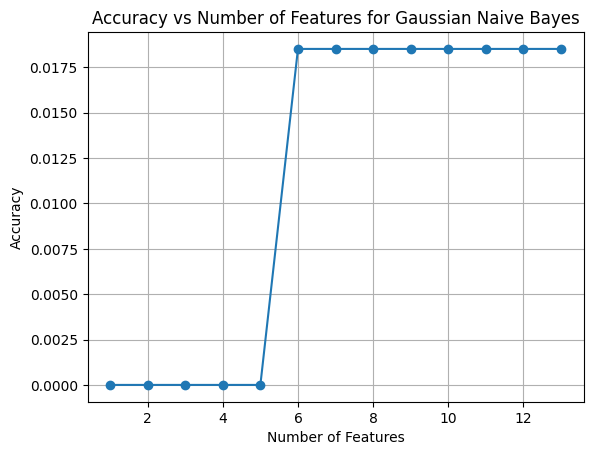

In [5]:
plt.figure()
plt.plot(range(1, num_features+1), accuracies_features, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features for Gaussian Naive Bayes')
plt.grid(True)
plt.show()